## Installing and importing dependencies

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import os


#For Preprocessing
import re    # RegEx for removing non-letter characters
import nltk  #natural language processing
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *

# For Building the model
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns

#For data visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

pd.options.plotting.backend = "plotly"

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Cleaning and prepping dataset

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Amazon_review.csv')

In [ ]:
df = df.sample(20_000)

In [ ]:
df.head()

,Unnamed: 0,review,sentiment
4597,3158091,"Another WOW, just the depth and richness of he...",1
45898,2292544,"Among the previous reviews, ""M. Garrison"" and ...",0
31001,908262,"This movie is quite funny, and I didn't rememb...",1
18135,1213524,very repetitive; lacks the animation for child...,0
49112,515663,This book was published as the Post Cold War w...,1


In [ ]:
df = df[['review', 'sentiment']]
df

,review,sentiment
4597,"Another WOW, just the depth and richness of he...",1
45898,"Among the previous reviews, ""M. Garrison"" and ...",0
31001,"This movie is quite funny, and I didn't rememb...",1
18135,very repetitive; lacks the animation for child...,0
49112,This book was published as the Post Cold War w...,1
...,...,...
95385,Its only good for the few ok cards that are in...,0
98553,Re The Sony DVD GX Series DVD RecordersI would...,0
44691,"A great book, or guide i should say, for those...",1
61099,Simply doesn't work. I tried using more than t...,0


In [ ]:
# Check for missing data
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
# drop missing rows
df.dropna(axis=0, inplace=True)

In [ ]:
# dimensionality of the data
df.shape

(20000, 2)

In [ ]:
df.sentiment.value_counts()

1    10002
0     9998
Name: sentiment, dtype: int64

## Data Preprocessing

In [ ]:
def review_to_words(review):
    
    # convert to lowercase
    text = review.lower()
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    # return list
    return words

print("\nOriginal review ->", df['review'][0])
print("\nProcessed review ->", review_to_words(df['review'][0]))


Original review -> I just adopted a chocolate lab who loves to snuggle and rub against my furniture - leaving behind hair, dirt and oil. I was hesitant to try a slip cover but finally broke down and decided to try one. The velvet and color is very rich and my couch looks better than ever. The slipcover goes on and comes off easily for washing. It wasn't easy to iron so I would recommend a garment steamer for knocking out the wrinkles. It might have been less expensive to train the dog to stay off the furniture but I'm very much in love with my new couch (cover) and puppy!

Processed review -> ['adopt', 'chocol', 'lab', 'love', 'snuggl', 'rub', 'furnitur', 'leav', 'behind', 'hair', 'dirt', 'oil', 'hesit', 'tri', 'slip', 'cover', 'final', 'broke', 'decid', 'tri', 'one', 'velvet', 'color', 'rich', 'couch', 'look', 'better', 'ever', 'slipcov', 'goe', 'come', 'easili', 'wash', 'easi', 'iron', 'would', 'recommend', 'garment', 'steamer', 'knock', 'wrinkl', 'might', 'less', 'expens', 'train',

In [ ]:
# Apply data processing to each tweet
X = list(map(review_to_words, df['review']))

In [ ]:
df['sentiment'] = df['sentiment'].map({0:'Negative', 1:'Positive'})

# Output first five rows
df.head()

,review,sentiment
4597,"Another WOW, just the depth and richness of he...",Positive
45898,"Among the previous reviews, ""M. Garrison"" and ...",Negative
31001,"This movie is quite funny, and I didn't rememb...",Positive
18135,very repetitive; lacks the animation for child...,Negative
49112,This book was published as the Post Cold War w...,Positive


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels
le = LabelEncoder()
Y = le.fit_transform(df['sentiment'])

In [ ]:
print(X[0])
print(Y[0])

['anoth', 'wow', 'depth', 'rich', 'write', 'understand', 'god', 'word', 'love', 'encourag', 'enlighten', 'amaz', 'simpl', 'well', 'profound', 'word', 'impress', 'written', 'middl', '1800', 'address', 'anyth', 'relev', 'today', 'christian', 'secret', 'happi', 'life', 'complet', 'unabridg']
1


### Train and test split

In [ ]:
y = pd.get_dummies(df['sentiment'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=1)

### Bag of words (BOW) feature extraction

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer

vocabulary_size = 5000

# Tweets have already been preprocessed hence dummy function will be passed in 
# to preprocessor & tokenizer step
count_vector = CountVectorizer(max_features=vocabulary_size,
#                               ngram_range=(1,2),    # unigram and bigram
                                preprocessor=lambda x: x,
                               tokenizer=lambda x: x) 
#tfidf_vector = TfidfVectorizer(lowercase=True, stop_words='english')

# Fit the training data
X_train = count_vector.fit_transform(X_train).toarray()

# Transform testing data
X_test = count_vector.transform(X_test).toarray()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
#import sklearn.preprocessing as pr

# Normalize BoW features in training and test set
#X_train = pr.normalize(X_train, axis=1)
#X_test  = pr.normalize(X_test, axis=1)

In [ ]:
# print first 200 words/tokens
print(count_vector.get_feature_names_out()[:200])

['0' '00' '000' '1' '10' '100' '1000' '101' '10th' '11' '12' '120' '13'
 '14' '15' '150' '1500' '16' '17' '18' '1800' '19' '1930' '1950' '1960'
 '1970' '1980' '1981' '1984' '1988' '1990' '1995' '1998' '1999' '19th'
 '1st' '2' '20' '200' '2000' '2001' '2002' '2003' '2004' '2005' '2006'
 '2007' '2008' '2009' '2010' '2011' '2012' '20th' '21' '22' '23' '24' '25'
 '250' '26' '27' '28' '29' '2nd' '2pac' '3' '30' '300' '32' '33' '34' '35'
 '350' '36' '360' '38' '3d' '3rd' '4' '40' '400' '43' '44' '45' '46' '48'
 '4th' '5' '50' '500' '52' '55' '5th' '6' '60' '600' '64' '65' '650' '68'
 '6th' '7' '70' '700' '75' '8' '80' '800' '802' '8th' '9' '90' '95' '97'
 '98' '99' 'aa' 'aaron' 'ab' 'abandon' 'abil' 'abl' 'abruptli' 'absenc'
 'absolut' 'absorb' 'abstract' 'absurd' 'abus' 'ac' 'academ' 'academi'
 'accent' 'accept' 'access' 'accessori' 'accid' 'accident' 'accompani'
 'accomplish' 'accord' 'account' 'accur' 'accuraci' 'accus' 'ace' 'ach'
 'achiev' 'acid' 'acn' 'acoust' 'across' 'act' 'action' '

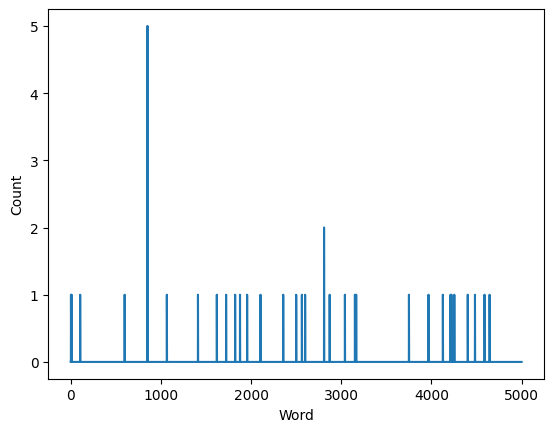

In [ ]:
# Plot the BoW feature vector
plt.plot(X_train[2,:])
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()

In [ ]:
from tensorflow import keras

In [ ]:
from keras.preprocessing.text import Tokenizer

max_words = 5000
max_len=50

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = keras.preprocessing.sequence.pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', df['review'][0])
X, tokenizer = tokenize_pad_sequences(df['review'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 I just adopted a chocolate lab who loves to snuggle and rub against my furniture - leaving behind hair, dirt and oil. I was hesitant to try a slip cover but finally broke down and decided to try one. The velvet and color is very rich and my couch looks better than ever. The slipcover goes on and comes off easily for washing. It wasn't easy to iron so I would recommend a garment steamer for knocking out the wrinkles. It might have been less expensive to train the dog to stay off the furniture but I'm very much in love with my new couch (cover) and puppy!
After Tokenization & Padding 
 [1095    7  569   59  447    2   59   90   47 2690    2   14   14   47
   25 1863   33    1   22   65   22    1    7   76  447    2   46 1889
   22    6   13  223   10    1  808    2 4077  250   12    9 3308  559
    1 1953    7    4  368  156  509    2]


In [ ]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [ ]:
y = pd.get_dummies(df['sentiment'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (12000, 50) (12000, 2)
Validation Set -> (4000, 50) (4000, 2)
Test Set -> (4000, 50) (4000, 2)


In [ ]:
import keras.backend as K

def f1_score(precision, recall):
    ''' Function to calculate f1 score '''
    
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout, BatchNormalization
from keras.metrics import Precision, Recall
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses

vocab_size = 5000
embedding_size = 32
epochs=20
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(MaxPooling1D(pool_size=4))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(2, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


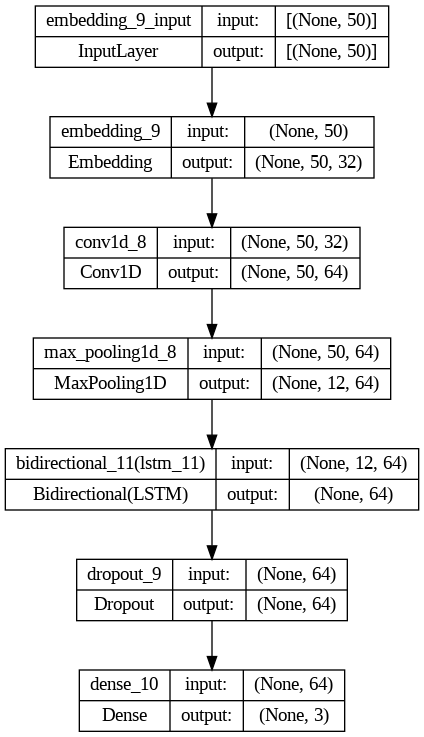

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
print(model.summary())

# Compile model
model.compile(loss='binary_crossentropy', optimizer=sgd, 
               metrics=['accuracy', Precision(), Recall()])


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 50, 32)            160000    
                                                                 
 conv1d_9 (Conv1D)           (None, 50, 64)            6208      
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 12, 64)           0         
 1D)                                                             
                                                                 
 bidirectional_12 (Bidirecti  (None, 64)               24832     
 onal)                                                           
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 2)               

In [ ]:
from keras import callbacks
callback = callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
batch_size = 64
history = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=batch_size, epochs=20, verbose=1, callbacks=[callback])

Epoch 1/15
188/188 [==============================] - 24s 103ms/step - loss: 0.6926 - accuracy: 0.5210 - precision_11: 0.5210 - recall_11: 0.5210 - val_loss: 0.6921 - val_accuracy: 0.4958 - val_precision_11: 0.4958 - val_recall_11: 0.4958
Epoch 2/15
188/188 [==============================] - 5s 25ms/step - loss: 0.6888 - accuracy: 0.5372 - precision_11: 0.5372 - recall_11: 0.5372 - val_loss: 0.6860 - val_accuracy: 0.5520 - val_precision_11: 0.5520 - val_recall_11: 0.5520
Epoch 3/15
188/188 [==============================] - 6s 31ms/step - loss: 0.6864 - accuracy: 0.5458 - precision_11: 0.5458 - recall_11: 0.5458 - val_loss: 0.6833 - val_accuracy: 0.5515 - val_precision_11: 0.5515 - val_recall_11: 0.5515
Epoch 4/15
188/188 [==============================] - 5s 28ms/step - loss: 0.6838 - accuracy: 0.5493 - precision_11: 0.5493 - recall_11: 0.5493 - val_loss: 0.6805 - val_accuracy: 0.5560 - val_precision_11: 0.5560 - val_recall_11: 0.5560
Epoch 5/15
188/188 [==============================

In [ ]:
# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.7943
Precision : 0.7943
Recall    : 0.7943
F1 Score  : 0.7942


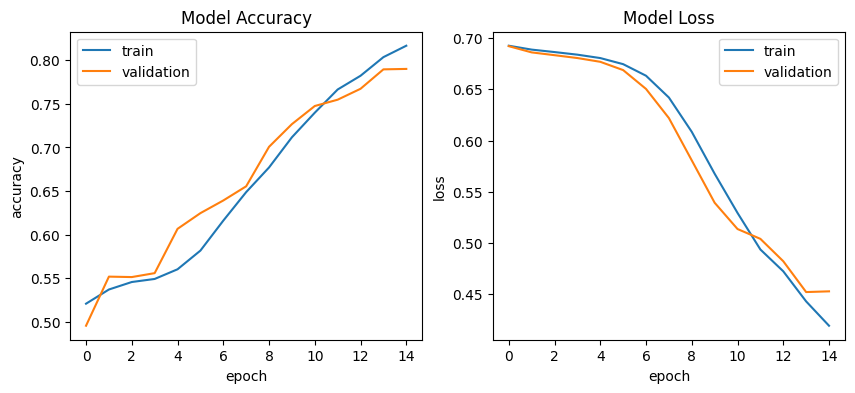

In [ ]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history)

In [ ]:
df.count()

review       20000
sentiment    20000
dtype: int64

In [ ]:
df.head(20000)

,review,sentiment
4597,"Another WOW, just the depth and richness of he...",Positive
45898,"Among the previous reviews, ""M. Garrison"" and ...",Negative
31001,"This movie is quite funny, and I didn't rememb...",Positive
18135,very repetitive; lacks the animation for child...,Negative
49112,This book was published as the Post Cold War w...,Positive
...,...,...
95385,Its only good for the few ok cards that are in...,Negative
98553,Re The Sony DVD GX Series DVD RecordersI would...,Negative
44691,"A great book, or guide i should say, for those...",Positive
61099,Simply doesn't work. I tried using more than t...,Negative
